## 산업정보화 중간고사 대체과제 
#### 12180339   방성진

In [20]:
# 라이브러리 임포트
# import 를 통해 라이브러리를 가져가오고, 후에 as 를 통해 코드 내에서 라이브러리 이름을 대신하여 약자를 사용할 수 있다.
import matplotlib.pyplot as plt # 파이썬에서 데이터를 시각적으로 나타내기 위한 라이브러리, 그래프를 그리거나 산점도를 나타낼 수 있다.
import numpy as np # numpy 는 Numerical Python의 약자로 여러가지 행렬연산과 수치 계산시에 사용되는 라이브러리이다. 
import pandas as pd # pandas 는 시각화 이전에 데이터를 처리하고 가공, 분석하는 등의 사용되는 라이브러리이다.
import random # 여러가지 방식의 난수를 생성하는 함수들이 있는 라이브러리이다. 
import copy # 깊은 복사를 통해 주소값(reference)이 아닌 값(value)을 복제하는 함수가 들어있는 라이브러리
import time # 여러가지 표준 시간에 대한 함수가 있는 라이브러리, 시간을 측정하고 계산하는데 사용되는 라이브러리이다. 

### 1. 알고리즘 구현

#### 버블정렬과 선택정렬 ( 시간 복잡도 O(N^2) 정렬법 )

In [21]:
# 버블 정렬
# 버블 정렬은 거품 정렬로써 점점 수면위로 거품이 떠오르는 듯한 정렬 방식이다.
# 처음에는 맨 뒤의 인덱스를 기준점으로 시작하여, 가장 큰 값이 가장 뒤에 나타나게 된다. 점차 기준점이 앞으로 이동하며 2번째로 큰 값, 3번째로 큰 값 ... n번째로 큰값까지 정렬되게 된다. 
def bubble_sort(arr): # bubble_sort 정의, 정렬하고자 하는 array가 인자값으로 들어오게된다. 
    for i in range(len(arr) - 1, 0, -1): # range(start, end, step size) 함수는 start 지점부터 end-1 지점까지 step size 만큼 더하여 연속형 객체를 만든다. 이 값을 for문으로 탐색하며 i 값을 바꾸어가며 반복을 수행한다.
        for j in range(i): # start 지점에 아무 값이 없는 경우 default 값으로 0이 들어가며 즉, j가 0 ~ i-1 까지 반복을 수행한다. 
            if arr[j] > arr[j + 1]: # 만약 j번째 인덱스의 값이 j+1번째 인덱스의 값보다 크다면, 즉 한칸 뒤에 있는 값보다 앞에 있는 값이 더 크다면, 
                arr[j], arr[j + 1] = arr[j + 1], arr[j] # 두수의 위치를 바꾸어준다.
    return arr

In [22]:
# 선택 정렬
# 선택정렬은 정렬된 값을 배열의 맨 앞부터 하나씩 채워나가는 방식이다. 
# 처음에는 0번째 인덱스부터 시작하여 가장 작은 값이 0번째 인덱스에 오게끔 하는 정렬방식이며, 기준점이 0,1,2...n-1 이렇게 가게 되면서 비교범위 또한 하나씩 줄게 되고,
# 비교군 중 가장 작은 값을 현재 기준점 인덱스(코드상에서는 i)에 위치시키는 방식이다. 
def selection_sort(arr): # selection_sort 정의, 정렬하고자 하는 array가 인자값으로 들어오게 된다. 
    for i in range(len(arr) - 1): # 0번 인덱스부터 len(arr)-1 까지 기준점이 변화한다. 
        min_idx = i # 비교구간에서 가장 작은 인덱스를 저장하는 변수 min_idx를 정의하고, 초기값으로는 현재 기준점 인덱스를 넣어준다. 
        for j in range(i + 1, len(arr)): # 비교구간을 정의해준다. 이 때 비교 구간은 기준점 인덱스 + 1 ~ N 이다. 
            if arr[j] < arr[min_idx]: # j 인덱스에 있는 값이 만약 min_idx 인덱스에 있는 값보다 
                min_idx = j # min_idx 즉 가장 작은 수의 위치를 j 인덱스로 갱신한다.
        arr[i], arr[min_idx] = arr[min_idx], arr[i] # 가장 작은 수의 위치와 기준점 인덱스(i)의 위치를 바꾸어준다. 
    return arr

#### 병합정렬과 퀵정렬 (시간 복잡도 O(Nlog(N)) 을 가지는 정렬법)


In [23]:
# 병합정렬
# 분할정복 개념을 사용한 정력 방식으로, 문제를 조그맣게 나눈 후에 정렬하고, 재귀적으로 다시 올라가면서 정렬을 수행한다.
# 문제를 가장 작게 나눈 후에 간단한 정렬문제를 통해 상위 정렬문제를 해결하는 방식의 정렬 알고리즘이다. 
# 계속해서 문제를 분할할 때 mid를 기준으로 두가지 array로 분할하게 되고 트리 구조를 생각을 하게되면, log(N)의 복잡도를 가지게 되고, 각층마다 N번 탐색하므로, O(N * log(N))
def merge_sort(arr): # merge sort를 정의해준다.
    if len(arr) < 2: # array의 길이가 2보다 작을 때에는 array를 반환해준다. 
        # 2보다 작으면 정렬할 필요가 없기 때문
        return arr

    mid = len(arr) // 2 # 중심를 기준으로 문제를 분할하기 위해 array를 반으로 나눈 몫을 mid에 저장한다. 
    low_arr = merge_sort(arr[:mid]) # 중심을 기준으로 자른 배열의 앞쪽 배열을 슬라이싱하여 저장한다. 이 때 재귀를 이용하여, 분할 정복 알고리즘을 통해 가장 작은 문제부터 풀어나간다.
    high_arr = merge_sort(arr[mid:]) # 중심을 기준으로 자른 배열의 뒷쪽 배열을 슬라이싱하여 저장한다. 이 때 재귀를 이용하여, 분할 정복 알고리즘을 통해 가장 작은 문제부터 풀어나간다.

    merged_arr = [] # 합쳐질 array를 저장할 공간
    l = h = 0 # low arr의 인덱스가 될 l 과 high arr의 인덱스가 될 h를 선언해준다.
    while l < len(low_arr) and h < len(high_arr):
        # l과 h의 값은 인덱스를 나타내므로, 배열의 크기보다 크거나 같으면 안되기 때문에 조건을 설정해준다. 
        if low_arr[l] < high_arr[h]: # 만약 low array[l] 값이 high_array[h] 값보다 작다면,  
            merged_arr.append(low_arr[l]) # 그 때의 low_arr[l] 값을 저장한다. 
            # 작은 값부터 차례대로 저장해야되기 때문. 
            l += 1 # 그리고 인덱스를 하나 올려서 다음값과 high_arr[h]를 비교해준다.
        else: # low_arr[l] 이 high_arr[h]보다 크거나 같으면, 
            merged_arr.append(high_arr[h]) # 마찬가지로 더 작은 수인 high_arr[h]를 리스트에 저장한다.
            h += 1 # # 그리고 인덱스를 하나 올려서 다음값과 low_arr[l]를 비교해준다.
    merged_arr += low_arr[l:] # low_arr의 남은 부분의 arr 를 merge_arr에 병합해준다.
    merged_arr += high_arr[h:] # high_arr의 남은 부분의 arr를 merge_arr에 병합해준다.
    return merged_arr # 합쳐진 리스트를 반환한다. 

In [24]:
# 퀵 정렬
# 마찬가지로 재귀 구조를 이용한 분할 정복 알고리즘이다. 
# pivot 값 하나를 선정한 이후 pivot보다 작은 값을 왼편, 큰 값을 오른편에 정렬하게 되면, 그 이후에는 왼편과 오른편의 값들을 서로 비교할 필요가없음
# 왼편은 왼편, 오른편은 오른편끼리만 비교하여, 정렬하는 알고리즘 
def quick_sort(arr): # 퀵정렬을 선언해준다.
    if len(arr) <= 1: # 마찬가지로 비교대상이 없을 때에는 
        return arr # 바로 return 해준다.
    pivot = arr[len(arr) // 2] # pivot 값을 리스트 중간에 위치한 값으로 정의한다.
    lesser_arr, equal_arr, greater_arr = [], [], []
    # 재귀적으로 전달할 값을 정리해야하므로, pivot보다 작은 값을 저장할 리스트, pivot값과 같은 값을 저장할 리스트, pivot값보다 큰 값들을 저장할 리스트를 정의한다.
    for num in arr: # array를 차례차례 탐색하면서, num 값을 갱신 
        if num < pivot: # 만약 그 num값이 pivot 값보다 작으면, 
            lesser_arr.append(num) # 왼편 리스트에 요소를 추가해준다.
        elif num > pivot: # 만약 그 num값이 pivot값보다 클 때,
            greater_arr.append(num) # 오른편 리스트에 요소를 추가해준다.
        else:
            equal_arr.append(num) # 만약 값이 같다면, 재귀로 들어가지 않는 equal_arr에 요소를 추가한다.
    return quick_sort(lesser_arr) + equal_arr + quick_sort(greater_arr)
    # equal_arr 를 제외한 나머지 두개의 array를 재귀적으로 돌리면서 정렬시킨 후 병합시킨다.

### 2. 알고리즘 테스트 진행

In [25]:
temp = [5,3,2,3,4,1,2]
# temp 값을 깊은 복사를 통해 주소가 아닌 값만 복사한다. 이렇게 해야 원형 리스트인 temp가 바뀌지 않는다.
print(bubble_sort(copy.deepcopy(temp))) 
print(selection_sort(copy.deepcopy(temp)))
print(merge_sort(copy.deepcopy(temp)))
print(quick_sort(copy.deepcopy(temp)))
print(temp) # 원형 데이터가 안전하게 유지되는 것을 확인할 수 있다. 

[1, 2, 2, 3, 3, 4, 5]
[1, 2, 2, 3, 3, 4, 5]
[1, 2, 2, 3, 3, 4, 5]
[1, 2, 2, 3, 3, 4, 5]
[5, 3, 2, 3, 4, 1, 2]


### 3. 데이터 생성

In [27]:
# 데이터 생성
# 10, 100, 1000, 10000, 100000 개의 랜덤 데이터셋을 생성한다. 
rand_data = [[] for i in range(5)] # 리스트 내포라는 개념으로 원하는 크기의 리스트를 반복문을 통해서 만들어줄 수 있다.  
# 빈공간 리스트를 5번 반복했기 때문에 [[], [], [], [], [], []] 다음과 같은 리스트가 생성된다.
for i in range(5): # 1부터 6까지 5번 돌아가는 반복문
    rand_data[i] = random.sample(range(1, 10**(i+2)), 10**(i+1))
    # random.sample 의 첫번째 인자값에는 iteration이 가능한 객체가 들어가고, 두번째 인자값에는 얼마만큼 생성할 것인지 개수가 들어간다.
    # 따라서 코드에서는 원하는 범위 내에서 몇개의 샘플을 만들 것인지에 대한 코드이다.
    print(len(rand_data[i])) # 잘 생성되었나 길이를 통해 확인

10
100
1000
10000
100000


### 4. 데이터 크기별 실행 시간 측정

In [31]:
def time_calculation(sort_method, dataset):
    # sort_method에는 정렬 알고리즘의 이름이 문자열 형태로 들어온다. 
    # dataset에는 만들어놓은 random data가 들어온다. 10, 100,1000,10000,100000 길이를 가진 5개의 랜덤 리스트가 들어온다.
    result = [] # 경과시간의 결과를 저장하는 리스트
    sample_num = 5 # sample의 개수
    for i in range(sample_num): # sample 의 개수는 5개이고, 5번 반복
        start_time = time.time() 
        # 시작시간을 기록한다. 이 함수는 1970년 1월 1일 0시 0분 0초(UTC)부터 현재까지의 경과 시간을 초 단위로 반환한다.
        copy_list = copy.deepcopy(dataset[i]) # dataset[i]를 깊은 복사를 통해 데이터 원형을 건드리지 않고, 값만 복사한다. 

        if sort_method == "bubble_sort": # sort_method가 bubble_sort라면, 
            bubble_sort(copy_list) # bubble sort 실행
        elif sort_method == "selection_sort": # sort_method가 selection_sort라면, 
            selection_sort(copy_list) # selection_sort 실행
        elif sort_method == "merge_sort": # sort_method가 merge_sort라면, 
            merge_sort(copy_list) # merge_sort 실행
        elif sort_method == "quick_sort": # sort_method가 quick_sort라면, 
            quick_sort(copy_list) # quick_sort 실행
        
        elapsed_time = time.time() - start_time # 종료시점의 시각 time.time()과 start_time을 빼서, 경과시간을 계산한다. 
        print("sort_method : ", sort_method, "data len : ", len(dataset[i]), "done")
        result.append(elapsed_time) # 현재 데이터셋에 대한 경과 시간을 result에 추가한다.
    return result

In [32]:
# 각 sort 알고리즘에 대해 경과시간 측정
# 마찬가지로 deepcopy를 통해 데이터 원형(rand_data)을 해치지 않도록한다.
elapsed_time_bubble_sort = time_calculation(sort_method = "bubble_sort", dataset = copy.deepcopy(rand_data))
elapsed_time_selection_sort = time_calculation(sort_method = "selection_sort", dataset = copy.deepcopy(rand_data))
elapsed_time_merge_sort = time_calculation(sort_method = "merge_sort", dataset = copy.deepcopy(rand_data))
elapsed_time_quick_sort = time_calculation(sort_method = "quick_sort", dataset = copy.deepcopy(rand_data))


sort_method :  bubble_sort data len :  10 done
sort_method :  bubble_sort data len :  100 done
sort_method :  bubble_sort data len :  1000 done
sort_method :  bubble_sort data len :  10000 done
sort_method :  bubble_sort data len :  100000 done
sort_method :  selection_sort data len :  10 done
sort_method :  selection_sort data len :  100 done
sort_method :  selection_sort data len :  1000 done
sort_method :  selection_sort data len :  10000 done
sort_method :  selection_sort data len :  100000 done
sort_method :  merge_sort data len :  10 done
sort_method :  merge_sort data len :  100 done
sort_method :  merge_sort data len :  1000 done
sort_method :  merge_sort data len :  10000 done
sort_method :  merge_sort data len :  100000 done
sort_method :  quick_sort data len :  10 done
sort_method :  quick_sort data len :  100 done
sort_method :  quick_sort data len :  1000 done
sort_method :  quick_sort data len :  10000 done
sort_method :  quick_sort data len :  100000 done


In [35]:
elapsed_time_merge_sort = time_calculation(sort_method = "merge_sort", dataset = copy.deepcopy(rand_data))
elapsed_time_quick_sort = time_calculation(sort_method = "quick_sort", dataset = copy.deepcopy(rand_data))

sort_method :  merge_sort data len :  10 done
sort_method :  merge_sort data len :  100 done
sort_method :  merge_sort data len :  1000 done
sort_method :  merge_sort data len :  10000 done
sort_method :  merge_sort data len :  100000 done
sort_method :  quick_sort data len :  10 done
sort_method :  quick_sort data len :  100 done
sort_method :  quick_sort data len :  1000 done
sort_method :  quick_sort data len :  10000 done
sort_method :  quick_sort data len :  100000 done


In [36]:
print(elapsed_time_bubble_sort)
print(elapsed_time_selection_sort)
print(elapsed_time_merge_sort)
print(elapsed_time_quick_sort)

[2.193450927734375e-05, 0.00036406517028808594, 0.03579378128051758, 4.013828992843628, 662.2731411457062]
[2.384185791015625e-05, 0.000202178955078125, 0.01816725730895996, 1.8644721508026123, 418.7926239967346]
[2.6941299438476562e-05, 0.00015687942504882812, 0.0016777515411376953, 0.022007226943969727, 0.299314022064209]
[2.4080276489257812e-05, 0.00011897087097167969, 0.0011649131774902344, 0.013437986373901367, 0.1896989345550537]


### 5. 그래프 생성

In [38]:
# Data
test_range = [10, 100, 1000, 10000, 100000] # rand_data의 각각의 데이터 사이즈
df=pd.DataFrame({'x': test_range, 'bubbleSort' : elapsed_time_bubble_sort,  'selectionSort': elapsed_time_selection_sort, 'mergeSort' : elapsed_time_merge_sort,'quickSort': elapsed_time_quick_sort})
# pandas를 통해 data 크기와 각각의 소요시간에 대한 dataframe 형식으로 저장한다. 

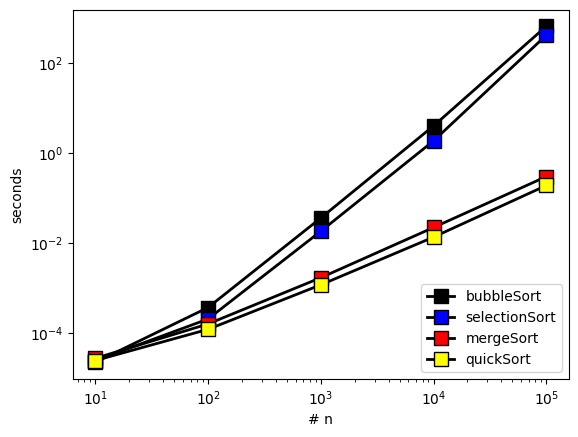

In [39]:
# https://matplotlib.org/stable/tutorials/introductory/pyplot.html
# multiple line plot
plt.xscale('log') # 스케일은 지수형태로 표현할 수 있도록 log scale로 적는다. 
plt.yscale('log') # 스케일은 지수형태로 표현할 수 있도록 log scale로 적는다. 

# plot은 'x' 즉, 데이터 개수가 x축, 각 알고리즘에 대해 소요된 시간을 y축에 적는다. marker는 's' 사각형으로 하고, marker의 색상을 각각 다르게 주어 구분할 수 있도록한다.
# 그래프의 선 색상은 검정색으로 설정한다. 라인의 두께는 2로 설정한다.
plt.plot('x', 'bubbleSort', data=df, marker="s", markerfacecolor='black', markersize=10, color='black', linewidth=2)
plt.plot('x', 'selectionSort', data=df, marker='s', markerfacecolor='blue', markersize=10, color='black', linewidth=2)
plt.plot('x', 'mergeSort', data=df, marker="s", markerfacecolor='red', markersize=10, color='black', linewidth=2)
plt.plot('x', 'quickSort', data=df, marker="s", markerfacecolor='yellow', markersize=10, color='black', linewidth=2)

plt.xlabel("# n") # xlabel은 x축 데이터가 의미하는 바를 적을 수 있는데, #n은 데이터의 사이즈이다. 
plt.ylabel("seconds") # ylabel 도 마찬가지로 y축 데이터가 의미하는 바를 적을 수 있는데, seconds는 각각의 알고리즘들의 소요시간을 의미한다.
plt.legend(loc='lower right') # 범례의 위치를 의미한다. 오른편 아랫쪽에 위치하도록한다. lower right. # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html